# Multispectral Remote Sensing Imagery in Python

## Introduction to Multi-Band Raster Data

In the previous weeks, you have worked with raster data derived from lidar remote sensing
instruments. These rasters consisted of one layer or band and contained information
height values derived from lidar data. In this lesson, you will
learn how to work with rasters containing multispectral imagery data stored within
multiple bands (or layers) in `Python`.

Just like you did with single band rasters, you can use the `rasterio.open()` function to open multi band raster data in `Python`.  

* To import multi-band raster data you will use the `stack()` function.
* If your multi-band data are imagery that you wish to composite, you can use
`plotRGB()`, instead of `plot()`, to plot a 3 band raster image.

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/single-vs-multi-band-raster-data.png">
    <img src="https://www.earthdatascience.org//images/courses/earth-analytics/raster-data/single-vs-multi-band-raster-data.png" alt="A raster can contain one or more bands. You can use the
    raster function to import one single band from a single OR multi-band
    raster.">
    </a>
    <figcaption>A raster can contain one or more bands. You can use the
    raster function to import one single band from a single OR multi-band
    raster. Source: Colin Williams, NEON.</figcaption>
</figure>

## What is Multispectral Imagery?

One type of multispectral imagery that is familiar to many of us is a color
image. A color image consists of three bands: red, green, and blue. Each
band represents light reflected from the red, green or blue portions of the
electromagnetic spectrum. The pixel brightness for each band, when composited
creates the colors that you see in an image. These colors are the ones your eyes
can see within the visible portion of the electromagnetic spectrum.

<figure>
    <a href="https://www.earthdatascience.org//images/courses/earth-analytics/raster-data/RGB-bands-raster-stack.jpg">
    <img src="https://www.earthdatascience.org//images/courses/earth-analytics/raster-data/RGB-bands-raster-stack.jpg" alt="A color image consists of 3 bands - red, green and blue. When
    rendered together in a GIS, or even a tool like Photoshop or any other
    image software, the 3 bands create a color image."></a>
    <figcaption>A color image consists of 3 bands - red, green and blue. When
    rendered together in a GIS, or even a tool like Photoshop or any other
    image software, the 3 bands create a color image.
	Source: Colin Williams, NEON.
    </figcaption>
</figure>

You can plot each band of a multi-band image individually using a grayscale
color gradient. Remember from the videos that you watched in class that the
LIGHTER colors represent a stronger reflection
in that band. DARKER colors represent a weaker reflection.


## Other Types of Multi-band Raster Data

Multi-band raster data might also contain:

1. **Time series:** the same variable, over the same area, over time.
2. **Multi or hyperspectral imagery:** image rasters that have 4 or more (multi-spectral) or more than 10-15 (hyperspectral) bands.

We will work with time series data later in the semester.

# NAIP data in Python

Now, we have learned that basic concepts associated with a multi-band raster. Next,
let's explore some spectral imagery in `Python` to better understand our study site -
which is the cold springs fire scare in Colorado near Nederland.



## About NAIP:

In this lesson, you will work with NAIP data.

>The National Agriculture Imagery Program (NAIP) acquires aerial imagery during the agricultural growing seasons in the continental U.S. A primary goal of the NAIP program is to make digital ortho photography available to governmental agencies and the public within a year of acquisition.

> NAIP is administered by the USDA's Farm Service Agency (FSA) through the Aerial Photography Field Office in Salt Lake City. This "leaf-on" imagery is used as a base layer for GIS programs in FSA's County Service Centers, and is used to maintain the Common Land Unit (CLU) boundaries. -- USDA NAIP Program

<a href="https://www.fsa.usda.gov/programs-and-services/aerial-photography/imagery-programs/naip-imagery/" target="_blank">Read more about NAIP</a>

NAIP is a great source of high resolution imagery across the United States.
NAIP imagery is often collected with just a red, green and Blue band. However,
some flights include a near infrared band which is very useful for quantifying
vegetation cover and health.

NAIP data access: The data used in this lesson were downloaded from the <a href="https://earthexplorer.usgs.gov/" target="_blank">USGS Earth explorer website. </a>

## Open NAIP Data in Python

Next, you will use NAIP imagery for the Coldsprings fire study area in
Colorado. To work with multi-band raster data you will use the `rasterio` and `geopandas`
packages. You will also use the `plot` module from the `earthpy` package for raster plotting.

Before you get started, make sure that your working directory is set.


In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Set working directory & get data
et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# This is a way to adjust plot parameters throughout your notebook
# it is OPTIONAL!
mpl.rcParams['figure.figsize'] = (14, 14)
mpl.rcParams['axes.titlesize'] = 20

To begin, you will use the rasterio open function to open the multi-band NAIP image

`rio.open("path-to-tif-file-here")`

Remember that it is ideal to use a context manager to open raster data in Python.
This ensures that the data connection is properly closed. 

`with rio.open("path-here") as src:`

Where `src` can be whatever variable name you select to store the raster object.

In [2]:
naip_2015_path = os.path.join("data", "cold-springs-fire", "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

with rio.open(naip_2015_path) as naip_2015_src:
    naip_2015_csf = naip_2015_src.read()
    naip_2015_csf_meta = naip_2015_src.meta

Above you imported a geotiff like you've done before. But this file is different. Notice the shape of the resulting numpy array. How many layers (known as bands) does it have?

In [3]:
naip_2015_csf.shape

(4, 2312, 4377)

You can use the earthpy function `plot_bands()` to plot the data. 

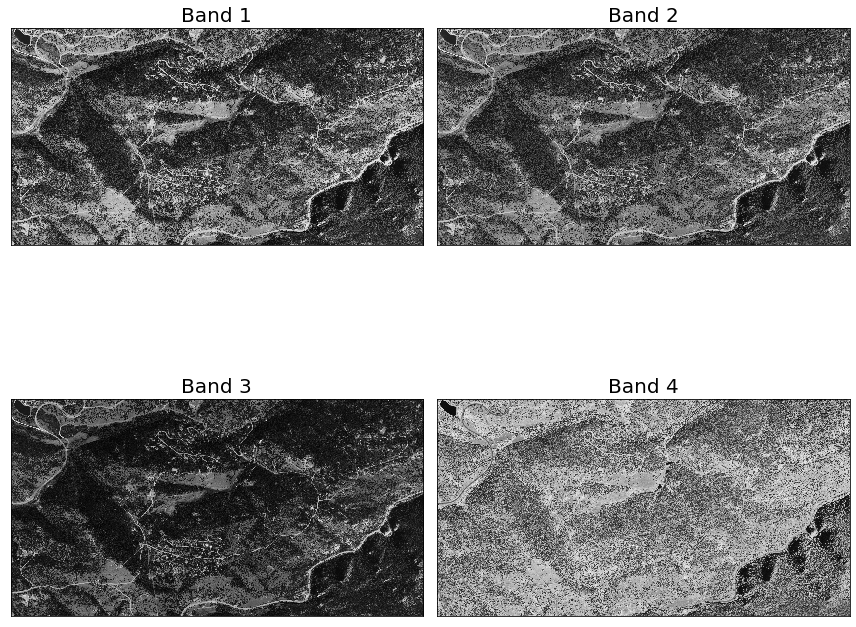

In [4]:
# Plot the first band of the NAIP data
ep.plot_bands(naip_2015_csf,
              cbar=False,
              cols=2)
plt.show()

Look closely at the count element in the metadata for your raster. Not that now, the count is 4 rather than 1. This is because you have multiple bands in your raster, one for each 'color' or type of light collected by the camera. For NAIP data you have red, green, blue and near infrared bands. When you worked with the lidar rasters in week 2 your count was 1 as a DSM or DTM is only composed of one band. 



### Customize your Plot: Plot Raster Band Images

Next plot each band in the raster. This is another intermediate step (like plotting histograms) that you might want to do when you first explore and open your data. You will not need this for your homework but you might want to do it to explore other data that you use in your career. Earthpy contains a `plot_bands()` function that allows you to quickly plot each band individually. Similar to plotting a single band, in each band "color", the brightest pixels are lighter in color or white representing a stronger reflectance for that color on that pixel. The darkest pixels are darker to black in color representing less reflectance of that color in that pixel. 

#### Plot Bands Using Earthpy

You can use the earthpy package to plot a single or all bands in your array. 
To use earthpy call:

`ep.plot_bands()`

run `help(ep.plot_bands)` to see all of the arguments that it accepts. 
The arguments below will be useful in this demo:  

* `title`: A single title for one band or a list of x titles for x bands in your array
* `figsize`: A tuple of 2 values representing the x and y dimensions of the image.
* `cmap`: The colormap that you'd like to use to plot the raster. Default is greyscale
* `cols`: If you are plotting more than one band you can specify the number of columns in the grid that you'd like to plot. 
* `extent` : Bounding box that the data will fill: (minx, miny, maxx, maxy). Used to fix the extent when overlaying an image with vector data. 
* `cbar` : Will turn off colorbar displayed for the image.
* `scale` : Will turn off bytescale scaling. When set to false, allows a plot to not be scaled from 0-255.
* `vmin`/`vmax` : Specify the vmin or vmax to scale imshow() plots.


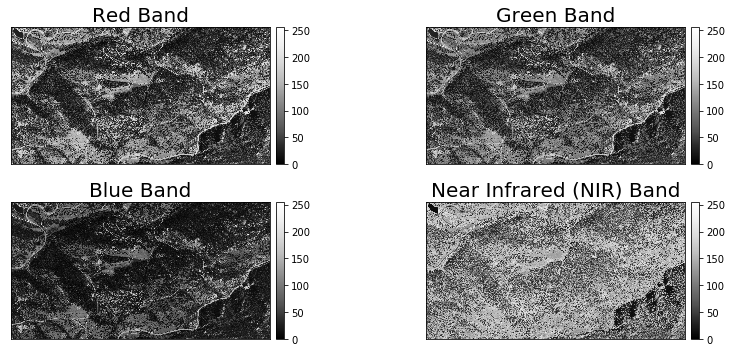

In [5]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# plot all bands using the earthpy function
ep.plot_bands(naip_2015_csf,
              title=titles,
              figsize=(12, 5),
              cols=2)
plt.show()

In [6]:
naip_2015_csf_meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 4377,
 'height': 2312,
 'count': 4,
 'crs': CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(1.0, 0.0, 457163.0,
        0.0, -1.0, 4426952.0)}

## Image Raster Data Values
Next, examine the raster's min and max values. What is the value range?


In [7]:
# view min and max value
print(naip_2015_csf.min())
print(naip_2015_csf.max())

17
242


This raster contains values between 0 and 255. These values represent degrees of brightness associated with the image band. In the case of a RGB image (red, green and blue), band 1 is the red band. When we plot the red band, larger numbers (towards 255) represent pixels with more red in them (a strong red reflection). Smaller numbers (towards 0) represent pixels with less red in them (less red was reflected). To plot an RGB image, we mix red + green + blue values, using the ratio of each. The ratio of each color is determined by how much light was recorded (the reflectance value) in each band. This mixture creates one single color than inturn makes up the full color image - similar to the color image your camera phone creates.

## 8 vs 16 Bit Images

It's important to note that this image is an 8 bit image. This means that all values in the raster are stored within a range of 0:255. Thus the brightest whites will be at or close to 255. The darkest values in each band will be closer to 0.

### OPTIONAL: Plot A Specific Band

You can plot a single band of your choice using numpy indexing. `naip_2015_csf[1]` will access just the second band - which is the green band when using NAIP data. 

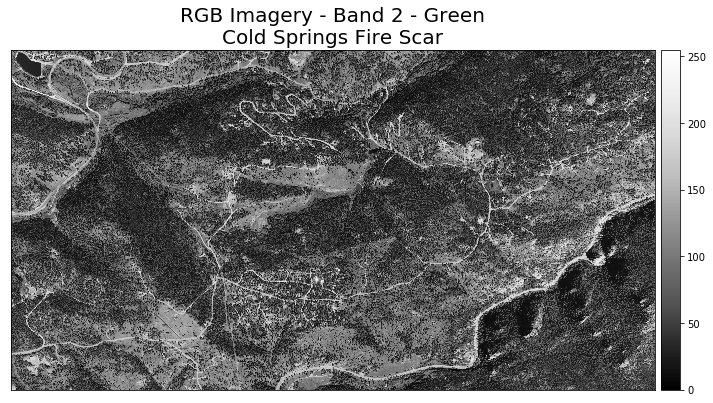

In [8]:
# Plot band 2 - green
ep.plot_bands(
    naip_2015_csf[1],
    title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
    cbar=True)
plt.show()

## Plot RGB Data in Python


Previously you have plotted individual bands using a greyscale color ramp in Python. Next, you will learn how to plot an RGB composite image. This type of image is similar in appearance to one you capture using a cell phone or digital camera. 

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/RGB-bands-raster-stack.jpg">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/RGB-bands-raster-stack.jpg" alt="A true color image consists of 3 bands - red, green and blue.
    When composited or rendered together in a GIS, or even a image-editor like
    Photoshop the bands create a color image."></a>
    <figcaption>A "true" color image consists of 3 bands - red, green and blue.
    When composited or rendered together in a GIS, or even a image-editor like
    Photoshop the bands create a color image.
	Source: Colin Williams, NEON.
    </figcaption>
</figure>




You can use the Earthpy function called `plot_rgb()` to quickly plot 3 band composite images.
This function has several key arguments including

1. `arr`: a numpy array in rasterio band order (bands first)
2. `rgb`: the three bands that you wish to plot on the red, green and blue channels respectively
3. `title`: OPTIONAL - if you want to add a title to your plot.

Similar to plotting with geopandas, you can provide an `ax=` argument as well to plot your data on a particular matplotlib axis.


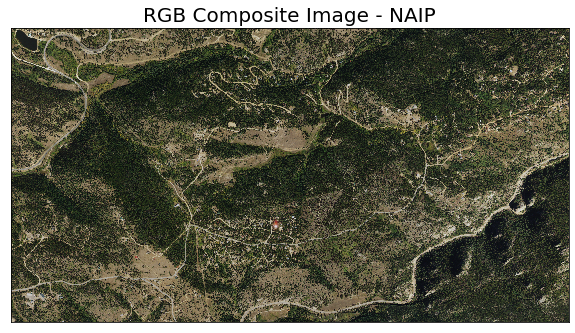

In [9]:
ep.plot_rgb(naip_2015_csf,
            rgb=[0, 1, 2],
            title="RGB Composite Image - NAIP")
plt.show()

Optionally, you can also provide the bands that you wish to plot, the title, the figure size, and other arguements to make the plot look how you want it to look.



## CIR Image

If the image has a 4th NIR band, you can create a CIR (sometimes called false color)
image. In a color infrared image, the NIR band is plotted on the "red" band. Thus vegetation, which reflects strongly in the NIR part of the spectrum, is colored "red". CIR images are often used to better understand vegetation cover and health in an area.

HELPFUL BAND INFOSHEET PDF: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=5&ved=2ahUKEwjukLq_tN7nAhWHqp4KHUnUDvMQFjAEegQIARAB&url=https%3A%2F%2Fwww.fsa.usda.gov%2FAssets%2FUSDA-FSA-Public%2Fusdafiles%2FAPFO%2Fsupport-documents%2Fpdfs%2Ffourband_infosheet_2017.pdf&usg=AOvVaw0lwlyEVpeWxJTw5aIPgoZA 

> Conversely, a CIR image is usually set up to display the infrared band data with a red tone. Red wavelengths will appear green, and green wavelengths will appear blue. Blue wavelengths are not displayed. Because healthy green vegetation will appear to be bright red, a CIR image is also known as a “false color” image.

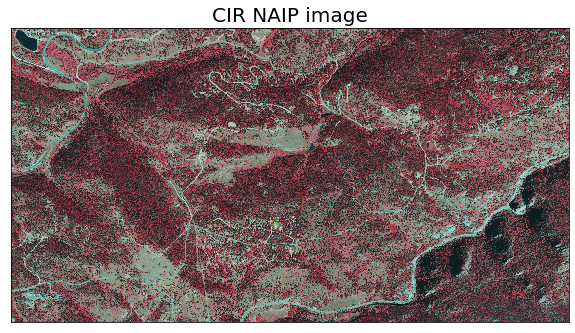

In [10]:
ep.plot_rgb(naip_2015_csf, title="CIR NAIP image",
            rgb=[3, 0, 1],
            figsize=(10, 8))
plt.show()

<div class="notice--warning" markdown="1">


## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge: Making Sense of Single Band Images

Plot all of the bands in the NAIP image using python, following the code examples above. Compare grayscale plots of band 1 (red), band 2 (green) and band 4 (near infrared). Is the forested area darker or lighter in band 2 (the green band) compared to band 1 (the red band)?

</div>

<!-- We'd expect a *brighter* value for the forest in band 2 (green) than in band 1 (red) because the leaves on trees of most often appear "green" -
healthy leaves reflect MORE green light compared to red light however the brightest values should be in the NIR band.-->



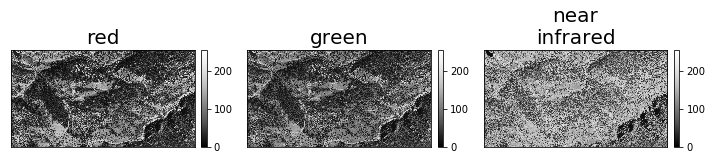

In [11]:
# TODO: Create a plot of three bands
titles = ['red', 'green', 'near\ninfrared']
ep.plot_bands(naip_2015_csf[[0, 1, 3]],
              figsize=(10,  5),
              title=titles)
plt.show()

## Data Cleanup: Image Stretch To Increase Contrast

The image above looks pretty good. You can explore whether applying a stretch to
the image improves clarity and contrast.

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/raster-image-stretch-dark.jpg">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/raster-image-stretch-dark.jpg" alt="When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/raster-image-stretch-light.jpg">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/raster-image-stretch-light.jpg" alt="When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

Below you use the skimage package to contrast stretch each band in your data to make the whites more bright and the blacks more dark. 

In the example below you only stretch bands 0,1 and 2 which are the RGB bands. To begin you

1. preallocate and array of zeros that is the same shape as your numpy array
2. then you look through each band in the image and rescale it

<i class="fa fa-star"></i> **Data Tip:** Read more about image stretch on the <a href="http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html" target = "_blank">scikit-image website</a>.
{: .notice--success }

For convenience there is stretch argument in `earthpy.plot_rgb`.

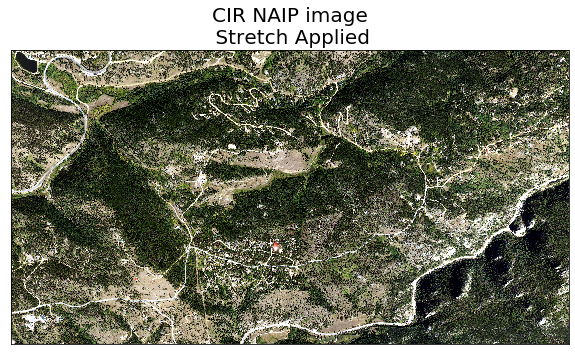

In [12]:
band_indices = [0, 1, 2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_2015_csf,
            rgb=band_indices,
            title="CIR NAIP image\n Stretch Applied",
            figsize=(10, 8), stretch=True)
plt.show()

What does the image look like using a different stretch? Any better? worse?

In this case, the stretch does increase the contrast in our image. 
However visually it may or may not be what you want to plot. 


## Data Exploration: Multiband Raster Histograms

You can use the `ep.hist()` function in earthpy to plot histograms for all bands in your raster. Hist() accepts several arguments including

* `colors=`: a list of colors to use for each histogram
* `titles=`: plot titles to use for each histogram

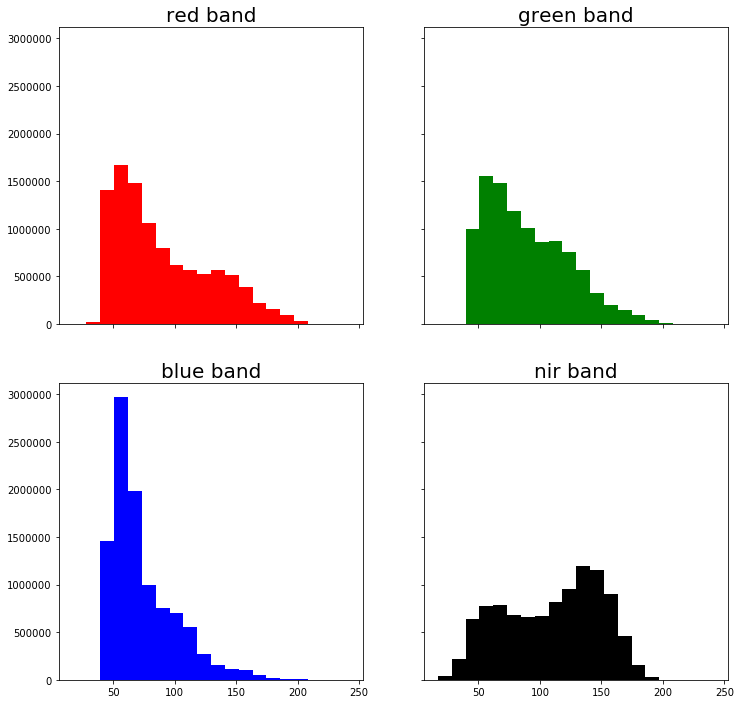

In [13]:
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'nir band']
ep.hist(naip_2015_csf,
        colors=colors,
        title=titles,
        cols=2)
plt.show()


# Vegetation Indices

A vegetation index is a single value that quantifies vegetation health or structure.
The math associated with calculating a vegetation index is derived from the physics
of light reflection and absorption across bands. For instance, it is known that
healthy vegetation reflects light strongly in the near infrared band and less strongly
in the visible portion of the spectrum. Thus, if you create a ratio between light
reflected in the near infrared and light reflected in the visible spectrum, it
will represent areas that potentially have healthy vegetation.


## Normalized Difference Vegetation Index (NDVI)

The Normalized Difference Vegetation Index (NDVI) is a quantitative index of
greenness ranging from 0-1 where 0 represents minimal or no greenness and 1
represents maximum greenness.

NDVI is often used for a quantitate proxy measure of vegetation health, cover
and phenology (life cycle stage) over large areas.

<figure>
 <a href="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg">
 <img src="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg" alt="NDVI image from NASA that shows reflectance."></a>
    <figcaption>NDVI is calculated from the visible and near-infrared light
    reflected by vegetation. Healthy vegetation (left) absorbs most of the
    visible light that hits it, and reflects a large portion of
    near-infrared light. Unhealthy or sparse vegetation (right) reflects more
    visible light and less near-infrared light. Source: NASA
    </figcaption>
</figure>

* <a href="http://earthobservatory.nasa.gov/Features/MeasuringVegetation/measuring_vegetation_2.php" target="_blank">
More on NDVI from NASA</a>

## Calculate NDVI in Python

Sometimes you can download already calculated NDVI data products from a data provider. 

However, in this case, you don't have a pre calculated NDVI product from NAIP data. You need to calculate NDVI using the NAIP imagery / reflectance data that you have downloaded from Earth Explorer.

### How to Derive the NDVI Vegetation Index From Multispectral Imagery

The normalized difference vegetation index (NDVI) uses a ratio between near infrared
and red light within the electromagnetic spectrum. To calculate NDVI you use the
following formula where NIR is near infrared light and
red represents red light. For your raster data, you will take the reflectance value
in the red and near infrared bands to calculate the index.

`(NIR - Red) / (NIR + Red)`

You can perform this calculation using matrix math with the `numpy` library. The `spatial` module in `earthpy` has a built in function to 
make this calculation easier that we will use in today's lesson.

Open up the NAIP data that you wish to calculate NDVI with. You will use the data from 2015 for this example that you downloaded for week 5 of this course:

`data/cold-springs-fire/naip/m_3910505_nw_13_1_20150919/crop/m_3910505_nw_13_1_20150919_crop.tif`

In [14]:
naip_2015_path = os.path.join("data", "cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919", "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

with rio.open(naip_2015_path) as src:
    naip_data = src.read()

# View shape of the data
naip_data.shape

(4, 2312, 4377)

Calculate NDVI using the `normalized_diff()` function from the `spatial` module in `earthpy`. In this case, the bands you are subtracting come from the same data file. The tif file format requires that all layers are in the same CRS and of the same size so you assume the data line up. Thus you do not need to test the data for equal shape, crs and extent. The `normalized_diff()` function uses regular numpy array math to find the normalized difference between the two bands entered. The actual calculation being done is `(b1-b2) / (b1 + b2)`, just as shown earlier. 

In [15]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])
naip_ndvi.min(), naip_ndvi.max()

(-0.6423841059602649, 0.5495495495495496)

Finally plot the data. Note below that the vmin and vmax attributes are used to stretch the colorbar across the full possible range of ndvi values (-1 to 1).

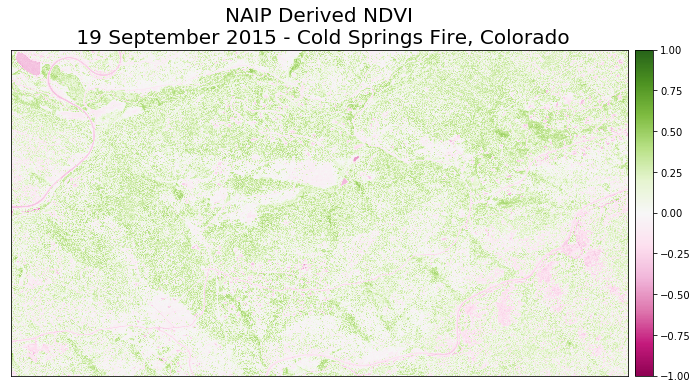

In [16]:
# Plot NDVI data
fig, ax = plt.subplots(figsize=(12, 6))
ep.plot_bands(naip_ndvi, cmap='PiYG',
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado",
              ax=ax, scale=False)
plt.show()

### View distribution of NDVI values

Using a histogram, you can view the distribution of pixel values in your NDVI output.

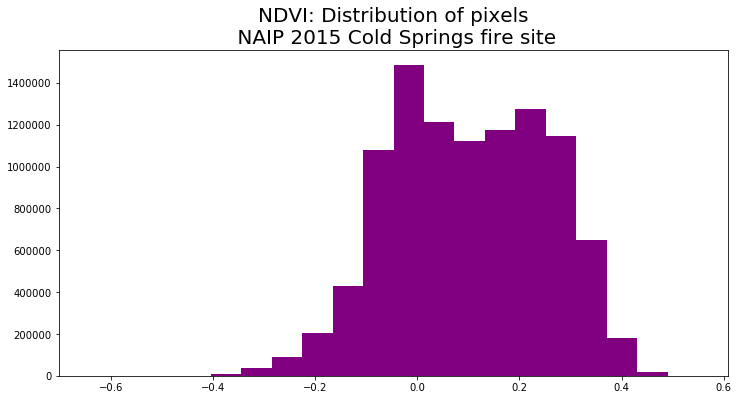

In [17]:
ep.hist(naip_ndvi,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])
plt.show()


# Landsat Tif Files in Python

When you used NAIP data, all (4) bands were stored in a single `.tif` file. However, sometimes data are downloaded in individual bands rather
than a single file. When using Landsat data, each band in a landsat scene is often stored in an individual `.tif` file.

## About Landsat Data

> At over 40 years, the Landsat series of satellites provides the longest temporal record of moderate resolution multispectral data of the Earth’s surface on a global basis. The Landsat record has remained remarkably unbroken, proving a unique resource to assist a broad range of specialists in managing the world’s food, water, forests, and other natural resources for a growing world population.  It is a record unmatched in quality, detail, coverage, and value. Source: <a href="https://landsat.usgs.gov/about-landsat" target="_blank">USGS</a>


<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/TimelineOnlyForWebRGB.png">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/TimelineOnlyForWebRGB.png" alt="Landsat 40 year timeline source: USGS.">
    </a>
    <figcaption>The 40 year history of landsat missions. Source: USGS - <a href="https://landsat.usgs.gov/landsat-missions-timeline" target = "_blank">USGS Landsat Timeline</a>
    </figcaption>
</figure>

Landsat data are spectral and collected using a platform mounted on a satellite in space that orbits the earth. The spectral bands
and associated spatial resolution of the first 9 bands in the Landsat 8 sensor
are listed below.

#### Landsat 8 Bands

| Band | Wavelength range (nanometers) | Spatial Resolution (m) | Spectral Width (nm)|
|-------------------------------------|------------------|--------------------|----------------|
| Band 1 - Coastal aerosol | 430 - 450 | 30 | 2.0 |
| Band 2 - Blue | 450 - 510 | 30 | 6.0 |
| Band 3 - Green | 530 - 590 | 30 | 6.0 |
| Band 4 - Red | 640 - 670 | 30 | 0.03 |
| Band 5 - Near Infrared (NIR) | 850 - 880 | 30 | 3.0 |
| Band 6 - SWIR 1 | 1570 - 1650 | 30 | 8.0  |
| Band 7 - SWIR 2 | 2110 - 2290 | 30 | 18 |
| Band 8 - Panchromatic | 500 - 680 | 15 | 18 |
| Band 9 - Cirrus | 1360 - 1380 | 30 | 2.0 |

### Understand Landsat Data
When working with landsat, it is important to understand both the metadata and
the file naming convention. The metadata tell you how the data were processed,
where the data are from and how they are structured.

The file names, tell you what sensor collected the data, the date the data were collected, and more.

<a href="https://landsat.usgs.gov/what-are-naming-conventions-landsat-scene-identifiers" target="_blank">More about the Landsat file naming convention.</a>

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/Collection_FileNameDiffs.png">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/Collection_FileNameDiffs.png" alt="landsat file naming convention">
    </a>
    <figcaption>Landsat file names Source: USGS Landsat - <a href="https://landsat.usgs.gov/what-are-naming-conventions-landsat-scene-identifiers" target = "_blank">Landsat Scene Naming Conventions</a>
    </figcaption>
</figure>

### Landsat File Naming Convention

Landsat and many other satellite remote sensing data is named in a way that tells you a about:

* When the data were collected and processed
* What sensor was used to collect the data
* What satellite was used to collect the data.

And more. 

Here you will learn a few key components of the landsat 8 collection file name. The first scene that you work with below is named:

`LC080340322016072301T1-SC20180214145802`

First, we have LC08

* **L:** Landsat Sensor
* **C:** OLI / TIRS combined platform
* **08:** Landsat 8 (not 7)

* **034032:** The next 6 digits represent the path and row of the scene. This identifies the spatial coverage of the scene

Finally, you have a date. In your case as follows:

* **20160723:** representing the year, month and day that the data were collected.

The second part of the file name above tells you more about when the data were last processed. You can read more about this naming convention using the link below.

<a href="https://landsat.usgs.gov/what-are-naming-conventions-landsat-scene-identifiers" target="_blank">Learn more about Landsat 8 file naming conventions.</a>

As you work wtih these data, it is good to double check that you are working with the sensor (Landsat 8) and the time period that you intend. Having this information in the file name makes it easier to keep track of this as you process your data. 

## Open Landsat .tif Files in Python

Now that you understand the Landsat 8 Collection file naming conventions, you will bring the data into Python. To begin, load additional libraries needed for this section. Most libraries we need, such as `numpy`, the `plot` module from `earthpy`, and `matplotlib` have already been loaded.

In [18]:
# This library is needed for file manipulation.
from glob import glob

You will be working in the `landsat-collect` directory. Notice that the data in that directory are stored by individual band. Each file is a single geotiff (.tif) rather than one tif with all the bands which is what you worked with in the previous lesson with NAIP data.  

### Why Are Landsat Bands Stored As Individual Files?
 
Conventionally landsat was stored in a file format called HDF - hierarchical
data format. However that format, while extremely efficient, is a bit more
challenging to work with. In recent years USGS has started to make each band
of a landsat scene available as a `.tif` file. This makes it a bit easier to use
across many different programs and platforms.

The good news is that you already know how to work with .tif files in `Python`. You just need to learn how to batch process a series of `.tif` files to work with Landsat 8 Collections. 

## Generate a List of Files in Python
 
To begin, explore the Landsat files in your `cold-springs-fire` directory. Start with the data:

`data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/`


In [19]:
landsat_path = os.path.join("data",
                            "cold-springs-fire",
                            "landsat_collect",
                            "LC080340322016072301T1-SC20180214145802",
                            "crop", "*.tif")

glob(landsat_path)

['data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180

In [20]:
# OPTIONAL: This below is just a shortcut to use the bash command "ls" within a jupyter notebook

!ls data//cold-springs-fire//landsat_collect//LC080340322016072301T1-SC20180214145802//crop//

LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif


Note that there is a crop directory. Landsat scenes are large. To make processing quicker for you as you learn, your instructor cropped the data to a smaller spatial extent. She also added the word `_crop` to the end of each file to ensure you know the data have been modified. 


Also notice that some of the layers are qualtiy assurance layers. Others have the word band in them. The layers with band in them are the reflectance data that you need to work with. 

To work with these files you will do the following

1.  You will generate a list of all files in the directory that contain the word **band** in the name. 
2. Loop through those layers to create a numpy array.

You will use the `glob` function and library to do this in Python. 


In [21]:
glob_crop_path = os.path.join("data", "cold-springs-fire",
                              "landsat_collect",
                              "LC080340322016072301T1-SC20180214145802",
                              "crop", "*")
glob(glob_crop_path)

['data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180

### Grab Subsets of File Names Using File Names and Other Criteria 

ABove you generated a list of all files in the directory. However you may wnat to subset that list to only include

1. `.tif` files
2. `.tif` files that contain the word "band" in them

Note that it is important that the file **ends with** .tif. So we use the dollar sign at the end of our pattern to tell Python to only grab files that end with .tif.

`path/*.tif` will grab all files in the crop directory that end with the .tif extension. 

In [22]:
# Just grab the tif files
glob(os.path.join("data", "cold-springs-fire",
                  "landsat_collect",
                  "LC080340322016072301T1-SC20180214145802",
                  "crop", "*.tif"))

['data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180

To only grab files containing the word band AND that end with .tif we use `*band*.tif`.
This tells python to look for the word band anywhere before the .tif extension AND anywhere within the file name. 


In [23]:
landsat_post_band_paths = glob(os.path.join("data", "cold-springs-fire",
                                            "landsat_collect",
                                            "LC080340322016072301T1-SC20180214145802",
                                            "crop",
                                            "*band*.tif"))
landsat_post_band_paths

['data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_201801

Sort the list to ensure the bands are in the correct order - starting at 1 and ending at 7.

In [24]:
landsat_post_band_paths.sort()
landsat_post_band_paths

['data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_201801

Now you have a list of all of the landsat bands in your landsat collections folder. You could chose to open each file individually using the `rio.open` (rasterio library) function.

Remember that Python uses 0 based indexing so band 3 is actually at index `[2]` not `[3]`.

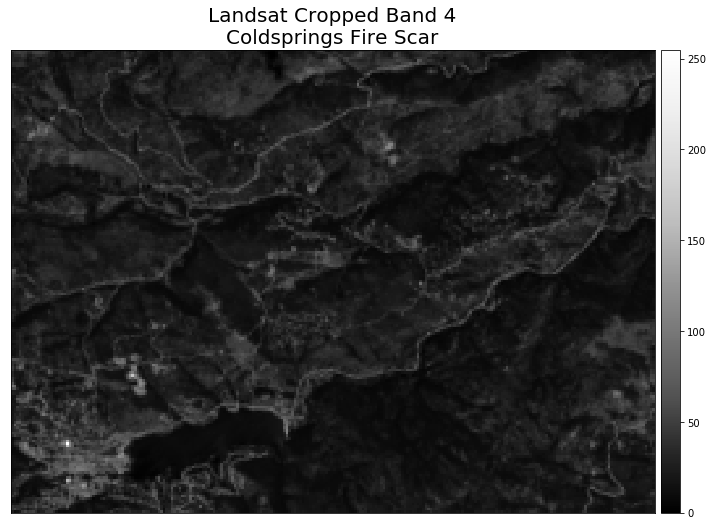

In [25]:
# Open a single band and plot
with rio.open(landsat_post_band_paths[3]) as src:
    landsat_band4 = src.read(1)

ep.plot_bands(landsat_band4,
              title="Landsat Cropped Band 4\nColdsprings Fire Scar")
plt.show()

### Create Raster Stack of All Landsat Bands in Python

It's sometimes less efficient to import bands individually into Python. 
For this class, we have build a function that will create a new stacked tif file
from a list of tif files. This function takes 2 arguments:

1. a list of tif files that are all in the same crs and of the same extent
2. a path to a new file where the stacked raster will be saved

To call it you use the following:

`es.stack(list-of-files-to-stack, "output/dir/filename.tif")`

Note that this stack function was written into the Earth Lab `earthpy` python package to avoid 
all of the steps that you would have to take to create the stack. In the next lesson we will break 
down how this function works in case you want to know. 

In [26]:
landsat_post_fire_path = os.path.join(
    "data", "cold-springs-fire", "outputs", "landsat_post_fire.tif")
# This will create a new stacked raster with all bands
# TO DO - this is not returning a masked array with a path!
landsat_post_fire, land_meta = es.stack(landsat_post_band_paths,
                                        nodata=True)

#### Plot Your Data 

Once you have stacked your data, you can import it and work with it as you need to!


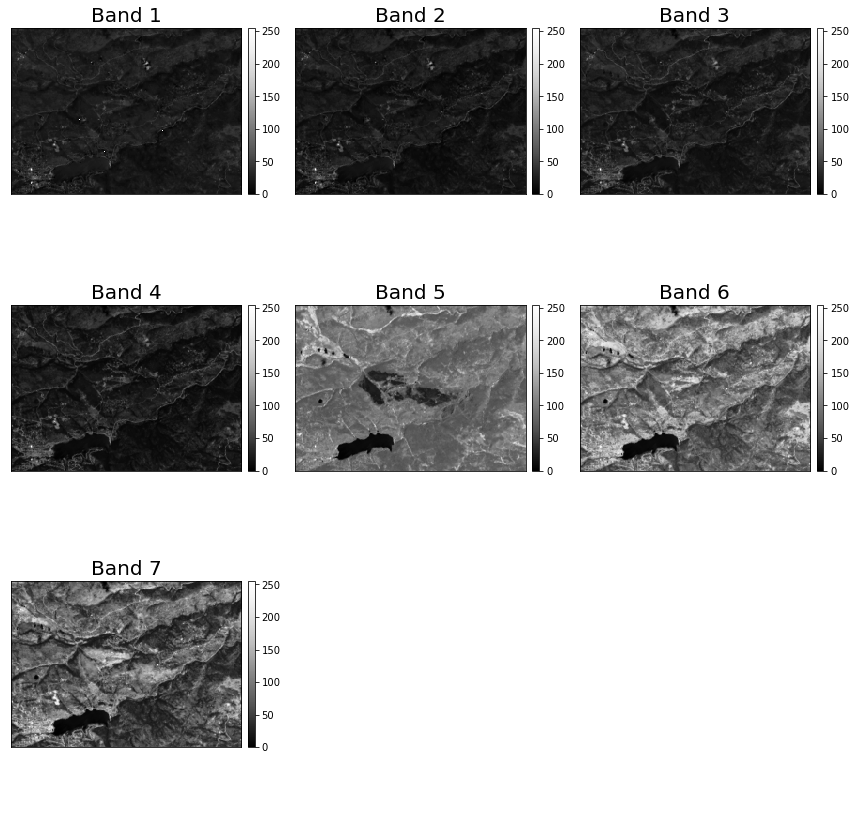

In [27]:
# TODO: Plot all bands using earthpy plot_bands
ep.plot_bands(landsat_post_fire)
plt.show()

## Plot RGB image

Just like you did with NAIP data, you can plot 3 band color composite images with Landsat too. Below you will plot an RGB image using landsat. Refer to the landsat bands in the table
at the top of this page to figure out the red, green and blue bands. Or read the
<a href="https://blogs.esri.com/esri/arcgis/2013/07/24/band-combinations-for-landsat-8/" target="_blank">ESRI landsat 8 band combinations</a> post.


In [28]:
# TODO: Create an rgb plot of landsat data. Be sure to select the correct bands!

Notice that the image above looks dark. You can stretch the image as you did with the NAIP data, too.
Below you use the stretch argument built into the earthpy `plot_rgb()` function. The `str_clip` argument allows you to specify how much of the tails of the data that you want to clip off. The larger the number, the most the data will be stretched or brightened.

<figure>
    <a href="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-image-stretch-dark.jpg">
    <img src="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-image-stretch-dark.jpg" alt="When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

<figure>
    <a href="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-image-stretch-light.jpg">
    <img src="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-image-stretch-light.jpg" alt="When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

In [29]:
# TODO: adjust the plot above and add a stretch to your RGB image of landsat data.

## Raster Pixel Histograms

You can create a histogram to view the distribution of pixel values in the rgb bands plotted above. 

In [30]:
# TODO: Create a plot that has a histogram for each band in your landsat stacked data

Now you've created a red, green blue color composite image. Remember red green and blue are colors that
your eye can see. Create a color infrared image using landsat bands: 4,3,2.


In [31]:
# TODO: Plot a CIR image of Landsat Data

# Overlay the Fire Boundary
Below is a full example showing you how to create a plotting extent for 
cropped data. Note that the code below required the plotting_extent function 
in rasterio.

`from rasterio.plot import plotting_extent`



In [32]:
# Import the fire boundary
fire_boundary_path = os.path.join("data",
                                  "cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")
fire_boundary = gpd.read_file(fire_boundary_path)

In [33]:
# open data
naip_path = os.path.join("data",
                         "cold-springs-fire",
                         "naip",
                         "m_3910505_nw_13_1_20150919",
                         "crop",
                         "m_3910505_nw_13_1_20150919_crop.tif")

# Create crop extent with cropped data
with rio.open(naip_path) as naip:
    fire_bound_utmz13 = fire_boundary.to_crs(naip.crs)
    naip_data, naip_meta = es.crop_image(naip, fire_bound_utmz13)
    plot_extent_naip = plotting_extent(naip_data[0], naip_meta["transform"])

/Users/leahwasser/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


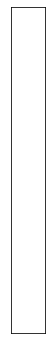

In [34]:
# Plot your data - nto that this plot doesn't work correctly
# This is because the plot extent is not defined properly
f, ax = plt.subplots(figsize=(6, 6))
ep.plot_rgb(naip_data,
            ax=ax)
fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='white',
                       linewidth=2)

plt.show()

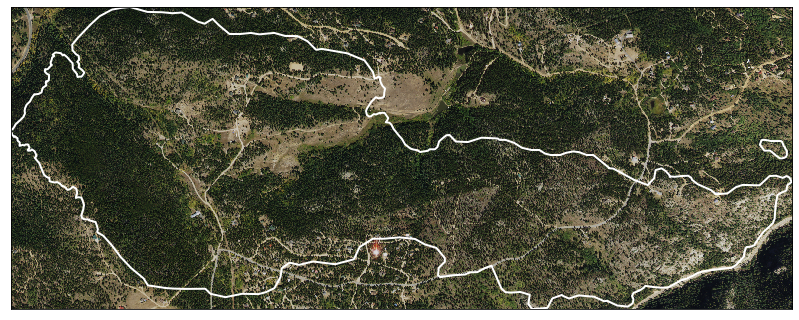

In [35]:
# Plot your data - not that things line up here because you ahve define the
# Plot extent for NAIP data.

f, ax = plt.subplots()
ep.plot_rgb(naip_data,
            ax=ax,
            extent=plot_extent_naip)
fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='white',
                       linewidth=2)

plt.show()

If the data are not cropped, you can just use the src object to create a plotting
extent. 

/Users/leahwasser/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


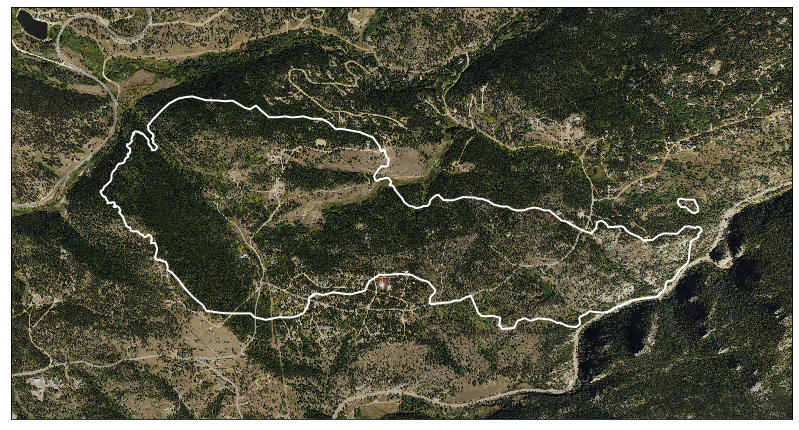

In [36]:
with rio.open(naip_path) as naip_src:
    fire_bound_utmz13 = fire_boundary.to_crs(naip_src.crs)
    naip_data = naip_src.read()
    plot_extent_naip = plotting_extent(naip_src)

# Plot your data - not that things line up here because you ahve define the
# Plot extent for NAIP data.
f, ax = plt.subplots()
ep.plot_rgb(naip_data,
            ax=ax,
            extent=plot_extent_naip)
fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='white',
                       linewidth=2)

plt.show()